In [76]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy

from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset


In [77]:
x_train_orig,y_train,x_test_orig,y_test,classes = load_dataset() 

In [78]:
x_train_orig
print(x_train_orig.shape)
print(type(x_train_orig))

(209, 64, 64, 3)
<class 'numpy.ndarray'>


In [79]:
print(y_train.shape)
print(type(y_train))

(1, 209)
<class 'numpy.ndarray'>


[1]


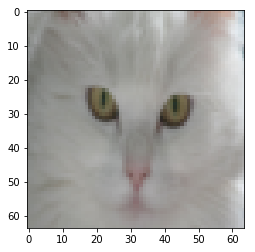

In [80]:
index=50;
plt.imshow(x_train_orig[index])
print(y_train[:,index])

[0]


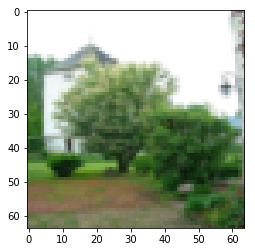

In [81]:
index=55;
plt.imshow(x_train_orig[index])
print(y_train[:,index])

In [82]:
print(x_train_orig.shape)
print(y_train.shape)

(209, 64, 64, 3)
(1, 209)


In [83]:
m_train = x_train_orig.shape[0]
m_test = x_test_orig.shape[0]
print("Training examples:"+ str(m_train))
print("Test examples:"+ str(m_test))

Training examples:209
Test examples:50


In [84]:
n_x = x_train_orig.shape[1]
print("Dimensions of image: " + str(n_x))

Dimensions of image: 64


In [85]:
x_train_flatten = x_train_orig.reshape(x_train_orig.shape[0],-1).T
print(x_train_flatten.shape)
x_test_flatten = x_test_orig.reshape(x_test_orig.shape[0],-1).T
print(x_test_flatten.shape)

(12288, 209)
(12288, 50)


In [86]:
x_train = x_train_flatten/255
x_test = x_test_flatten/255
print(x_train.shape)
print(x_test.shape)

(12288, 209)
(12288, 50)


In [87]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

(12288, 209)
(12288, 50)
(1, 209)
(1, 50)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [88]:
m_train=x_train.shape[1]
print(m_train)
m_test=x_test.shape[1]
print(m_test)


209
50


In [89]:
#Creating sigmoid fn

def sigmoid(x):
    s=1/(1+np.exp(-1*x))
    return s

In [96]:
def init(dim):
    w=np.zeros((dim,1))
    b=0
    return w,b

In [97]:
def prop(w,b,x,y):
    m=m_train
    
    z=(np.dot(w.T,x))+b
    a=sigmoid(z)
    
    cost=(-1/m)*np.sum( y*np.log(a) + (1-y)*np.log(1-a) )
    
    dz=a-y
    db=(1/m)*np.sum(dz)
    dw=(1/m)*np.dot(x,dz.T)
    
    return db,dw

In [98]:
def optimise(w,b,x,y,iter,alpha):
    for i in range(iter):
        db,dw=prop(w,b,x,y)
        w=w-alpha*dw
        b=b-alpha*db
    return w,b

In [99]:
def pred(w,b,x):
    
    m=m_test
    y_pred=np.zeros((1,m_test))
    w=w.reshape(x.shape[0],1)
    
    A=sigmoid(np.dot(w.T,x)+b)
    
    for i in range(m_test):
        if A[0,i] >0.5:
            y_pred[0,i]=1
        else:
            y_pred[0,i]=0
    return y_pred

In [100]:
def model(x_train,y_train,x_test,y_test,iter=1000,alpha=0.005):
    w,b=init(x_train.shape[0])
    w,b=optimise(w,b,x_train,y_train,iter,alpha)
    y_pred=pred(w,b,x_test)
    return y_pred

In [101]:
y_pred=model(x_train,y_train,x_test,y_test,iter=1000,alpha=0.005)

In [102]:
y_pred

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,
         1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,
         1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.]])

In [104]:
import pandas as pd

df=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
df.head(10)

,Actual,Predicted
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0
5,0,1.0
6,1,0.0
7,1,1.0
8,1,1.0
9,1,1.0


Actual[0]
Predicted[ 1.]


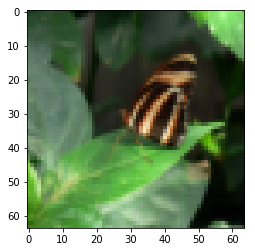

In [106]:
index=5;
plt.imshow(x_test_orig[index])
print("Actual" + str(y_test[:,index]))
print("Predicted" + str(y_pred[:,index]))

Actual[1]
Predicted[ 1.]


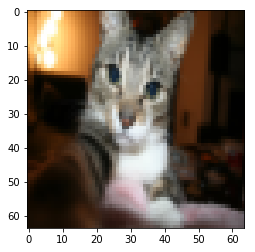

In [107]:
index=25;
plt.imshow(x_test_orig[index])
print("Actual" + str(y_test[:,index]))
print("Predicted" + str(y_pred[:,index]))

In [108]:
y_pred_t = y_pred.transpose()
print(y_pred.shape)
print(y_pred_t.shape)

(1, 50)
(50, 1)


In [109]:
y_test_t = y_test.transpose()
print(y_test.shape)
print(y_test_t.shape)

(1, 50)
(50, 1)


In [110]:
from sklearn import metrics

In [112]:
cnf_matrix = metrics.confusion_matrix(y_test_t,y_pred_t)
cnf_matrix

array([[12,  5],
       [ 9, 24]])

In [114]:
#Accuracy = (12+24)/50 = 72%
#Misclassification Rate = 28%

In [116]:
print("Accuracy:",metrics.accuracy_score(y_test_t, y_pred_t))

Accuracy: 0.72


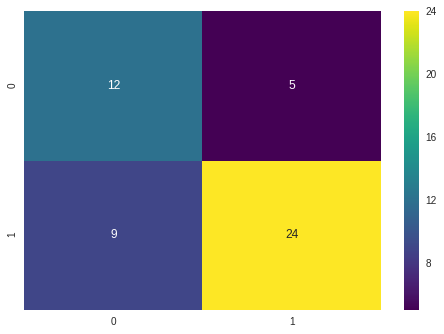

In [118]:
import seaborn as sns
sns.set()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis")